# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.


## The Data Science Pipeline

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [26]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd

# Load the pyplot collection of functions from matplotlib, as plt 
from matplotlib import pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [27]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.


**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [52]:
print(properties.shape)
print(properties.head)

(355, 49)
<bound method NDFrame.head of     Unnamed: 0 City of London Barking & Dagenham       Barnet       Bexley  \
0          NaT      E09000001          E09000002    E09000003    E09000004   
1   1995-01-01    91448.98487         50460.2266  93284.51832  64958.09036   
2   1995-02-01    82202.77314        51085.77983  93190.16963  64787.92069   
3   1995-03-01    79120.70256        51268.96956  92247.52435  64367.49344   
4   1995-04-01    77101.20804        53133.50526  90762.87492  64277.66881   
..         ...            ...                ...          ...          ...   
350 2024-02-01         849938             329987       571767       396589   
351 2024-03-01         826707             335377       571276       398238   
352 2024-04-01         810829             337073       569628       402705   
353 2024-05-01         829091             336654       575571       405443   
354 2024-06-01         828527             340403       585639       415496   

           Brent      B

**2.2. Cleaning the data**

- transpose the dataframe, 
- check out what its row indexes are, and 
- reset the index


In [30]:
df_transposed=properties.T # transpose the properties df
df_transposed=df_transposed.reset_index() # reset the index so it is not indexed by city
df_transposed.columns=df_transposed.iloc[0] # Make row 1 as column indices
df_transposed=df_transposed.iloc[1:] # remove duplicate row 1
df_transposed.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,936965,878204,853893,813400,828979,849938,826707,810829,829091,828527
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,336784,337251,340263,338341,332732,329987,335377,337073,336654,340403
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,589889,580546,581085,582023,580848,571767,571276,569628,575571,585639
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,398403,393381,396275,391739,394804,396589,398238,402705,405443,415496
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,538074,532596,518885,507287,520617,526461,511210,498630,494217,539180


**2.3. Cleaning the data (part 2)**

Rename the column names to more useful values

In [31]:
df_transposed = df_transposed.rename(columns={'Unnamed: 0':'London_Borough', pd.NaT: 'ID'}) # rename column indices for borough and ID
df_transposed.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,936965,878204,853893,813400,828979,849938,826707,810829,829091,828527
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,336784,337251,340263,338341,332732,329987,335377,337073,336654,340403
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,589889,580546,581085,582023,580848,571767,571276,569628,575571,585639
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,398403,393381,396275,391739,394804,396589,398238,402705,405443,415496
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,538074,532596,518885,507287,520617,526461,511210,498630,494217,539180


**2.4.Transforming the data**

Use the melt function to make the DataFrame tall 

In [53]:
df_tall=df_transposed.melt(id_vars=['London_Borough','ID'])
df_tall = df_tall.rename(columns={0:'Month', 'value': 'Average_Price'}) # rename column indices for borough and ID
print(df_tall.head)
df_tall['Average_Price']=pd.to_numeric(df_tall['Average_Price'])
df_tall.dtypes # Average Price is now of type float

<bound method NDFrame.head of            London_Borough         ID      Month Average_Price
0          City of London  E09000001 1995-01-01   91448.98487
1      Barking & Dagenham  E09000002 1995-01-01    50460.2266
2                  Barnet  E09000003 1995-01-01   93284.51832
3                  Bexley  E09000004 1995-01-01   64958.09036
4                   Brent  E09000005 1995-01-01   71306.56698
...                   ...        ...        ...           ...
16987              LONDON  E12000007 2024-06-01        523134
16988          SOUTH EAST  E12000008 2024-06-01        382522
16989          SOUTH WEST  E12000009 2024-06-01        317259
16990         Unnamed: 47        NaN 2024-06-01           NaN
16991             England  E92000001 2024-06-01        305370

[16992 rows x 4 columns]>


London_Borough            object
ID                        object
Month             datetime64[ns]
Average_Price            float64
dtype: object

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [54]:
df_tall['Average_Price'] = pd.to_numeric(df_tall['Average_Price'])
df_tall.dtypes

df_tall.count()

London_Borough    16992
ID                15930
Month             16992
Average_Price     15930
dtype: int64

**2.5. Cleaning the data (part 3)**

Check to see if we have an equal number of observations in the ID, Average Price, Month, and London Borough columns. There are only 32 London Boroughs.  

In [55]:
cleanDF1=df_tall[df_tall['Average_Price'].notna()]
cleanDF1.head(48)
cleanDF2=df_tall.dropna()
cleanDF2.head(48)
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']
cleanDF2=cleanDF2[~cleanDF2.London_Borough.isin(nonBoroughs)]
cleanDF2.head(32) # this is the clean dataframe ready to be assigned to "df"
df=cleanDF2
df.head()
df.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_Price            float64
dtype: object

In [35]:
df.head()

,London_Borough,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


**2.6. Visualizing the data**

To visualize the data, lets subset a particular London Borough with a line plot of Month against Average Price

Text(0, 0.5, 'Price')

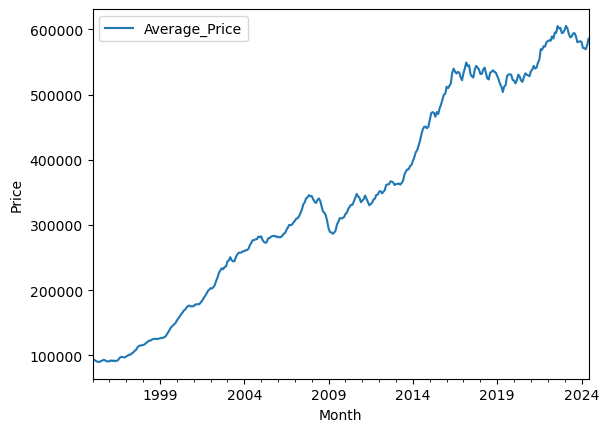

In [36]:
barnet_prices=df[df['London_Borough']=='Barnet']
ax=barnet_prices.plot(kind='line',x='Month',y='Average_Price')
ax.set_ylabel('Price')

To limit the number of data points we want to extract the year from every month value your *Month* column. 

To this end, we *could* apply a ***lambda function***. The logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 


In [37]:
df['Year'] = df['Month'].apply(lambda t: t.year)
df.tail()


,London_Borough,ID,Month,Average_Price,Year
16972,Sutton,E09000029,2024-06-01,426564.0,2024
16973,Tower Hamlets,E09000030,2024-06-01,456375.0,2024
16974,Waltham Forest,E09000031,2024-06-01,488279.0,2024
16975,Wandsworth,E09000032,2024-06-01,616803.0,2024
16976,Westminster,E09000033,2024-06-01,954279.0,2024


To groupby certain columns of interest (London Borough and Year), we can drop other columns. 

In [38]:
dft=df.drop(['ID','Month'],axis=1)
dft.head()
dfg = dft.groupby(by=['London_Borough','Year']).mean()
dfg.sample(20)
dfg=dfg.reset_index()
dfg.head(10)

,London_Borough,Year,Average_Price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441
5,Barking & Dagenham,2000,77549.513290
6,Barking & Dagenham,2001,88664.058223
7,Barking & Dagenham,2002,112221.912482
8,Barking & Dagenham,2003,142498.927800
9,Barking & Dagenham,2004,158175.982483


**3. Modeling**

Write a function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once this function is written, we want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.


In [39]:
def calc_price_ratio(d):
    y1998=float(d['Average_Price'][d['Year'] == 1998])
    y2018=float(d['Average_Price'][d['Year'] == 2018])
    ratio=[y2018/y1998]
    return ratio
calc_price_ratio(dfg[dfg['London_Borough'] == 'Barking & Dagenham'])

/var/folders/f9/xy6mhgjs26v3nwxxz3q0_yh00000gn/T/ipykernel_62655/3416223604.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y1998=float(d['Average_Price'][d['Year'] == 1998])
/var/folders/f9/xy6mhgjs26v3nwxxz3q0_yh00000gn/T/ipykernel_62655/3416223604.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y2018=float(d['Average_Price'][d['Year'] == 2018])


[4.89661861291754]

Loop through the boroughs to calculate ratios and write the answers to a new dataframe

In [57]:
final = {}
for b in dfg['London_Borough'].unique():
    borough = dfg[dfg['London_Borough']== b]
    final[b] = calc_price_ratio(borough)

df_ratios = pd.DataFrame(final)
df_ratios.head()

/var/folders/f9/xy6mhgjs26v3nwxxz3q0_yh00000gn/T/ipykernel_62655/3416223604.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y1998=float(d['Average_Price'][d['Year'] == 1998])
/var/folders/f9/xy6mhgjs26v3nwxxz3q0_yh00000gn/T/ipykernel_62655/3416223604.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y2018=float(d['Average_Price'][d['Year'] == 2018])


,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,4.896619,4.358196,4.248977,4.894554,4.094785,4.935353,5.30162,4.2011,4.311451,4.263472,...,4.741273,5.30539,4.471182,4.005162,5.516485,4.118523,4.626701,5.834756,4.757709,5.353565


Transpose the dataframe for analysis and plotting

In [43]:
df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()
df_ratios.head()

,index,0
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [44]:
df_ratios.rename(columns={'index':'Borough', 0:'2018'}, inplace=True)
df_ratios.head()

,Borough,2018
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


Sort Average values from highest to lowest

In [45]:
top_15 = df_ratios.sort_values(by='2018', ascending = False).head(15)
print(top_15)

                 Borough      2018
11               Hackney  6.198286
30        Waltham Forest  5.834756
27             Southwark  5.516485
22              Lewisham  5.449221
32           Westminster  5.353565
24                Newham  5.305390
6         City of London  5.301620
13              Haringey  5.134625
19  Kensington & Chelsea  5.082465
21               Lambeth  4.957751
5                 Camden  4.935353
0     Barking & Dagenham  4.896619
3                  Brent  4.894554
18             Islington  4.844048
10             Greenwich  4.763036


Make a plot to visualize the highest Average Prices in the London Boroughs

[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'City of London'),
 Text(7, 0, 'Haringey'),
 Text(8, 0, 'Kensington & Chelsea'),
 Text(9, 0, 'Lambeth'),
 Text(10, 0, 'Camden'),
 Text(11, 0, 'Barking & Dagenham'),
 Text(12, 0, 'Brent'),
 Text(13, 0, 'Islington'),
 Text(14, 0, 'Greenwich')]

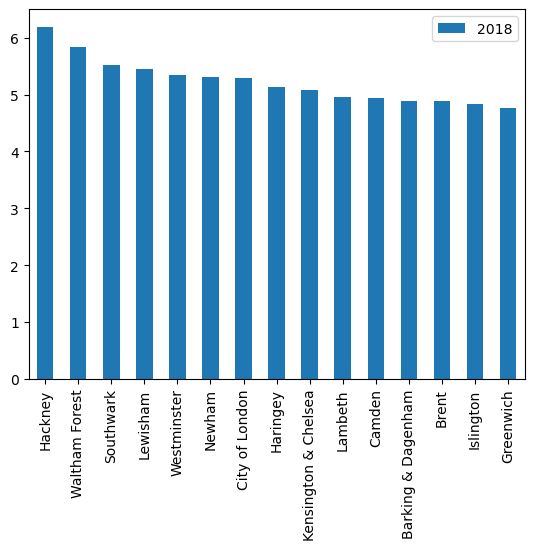

In [49]:
ax = top_15[['Borough', '2018']].plot(kind='bar')
ax.set_xticklabels(top_15.Borough)

In [47]:
dfg.max()

London_Borough       Westminster
Year                        2024
Average_Price     1447670.166667
dtype: object

In [48]:
top_15_table = pd.melt(top_15, id_vars= ['Borough'])
print(top_15_table)

                 Borough variable     value
0                Hackney     2018  6.198286
1         Waltham Forest     2018  5.834756
2              Southwark     2018  5.516485
3               Lewisham     2018  5.449221
4            Westminster     2018  5.353565
5                 Newham     2018  5.305390
6         City of London     2018  5.301620
7               Haringey     2018  5.134625
8   Kensington & Chelsea     2018  5.082465
9                Lambeth     2018  4.957751
10                Camden     2018  4.935353
11    Barking & Dagenham     2018  4.896619
12                 Brent     2018  4.894554
13             Islington     2018  4.844048
14             Greenwich     2018  4.763036


### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

# In conclusion, from the figure plotted we show the top 15 boroughs with the highest increase in average prices over the past two decades. London Borough, Hackney, has seen the highest increase in average prices over the past two decades!